<a href="https://colab.research.google.com/github/SyedHarshath/Computer-Vision/blob/main/Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

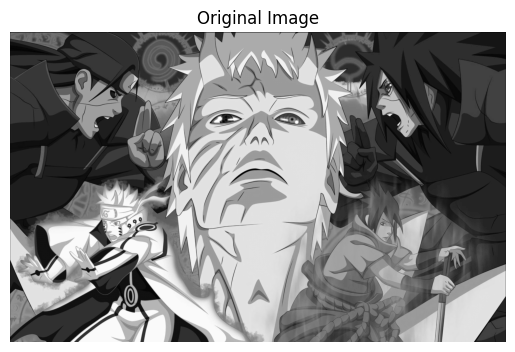

In [ ]:
image = cv2.imread("narutoshippuden.jpg")
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.title("Original Image")
plt.imshow(image_gray,cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
blurred_image = cv2.GaussianBlur(image_gray, (5, 5), 1.4)

### SOBEL EDGE DETECTION (3X3)

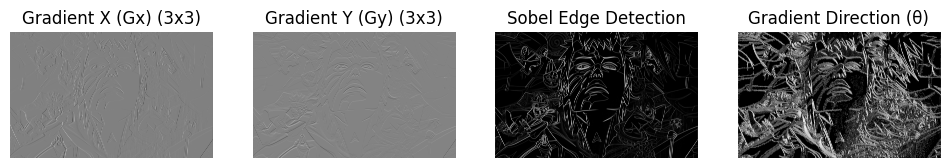

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

sobel_edges = cv2.magnitude(sobel_x, sobel_y)
sobel_edges = cv2.convertScaleAbs(sobel_edges)

gradient_direction = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)
gradient_direction = (gradient_direction + 180) % 180

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title("Gradient X (Gx) (3x3)")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title("Gradient Y (Gy) (3x3)")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(gradient_direction, cmap='gray')
plt.title("Gradient Direction (θ)")
plt.axis("off")

plt.show()

### ROBERT EDGE DETECTION

In [ ]:
Gx = np.array([[1, 0], [0, -1]], dtype=np.float32)
Gy = np.array([[0, 1], [-1, 0]], dtype=np.float32)

In [ ]:
rows, cols = blurred_image.shape

r_gradient_x = np.zeros((rows-1, cols-1), dtype=np.float32)
r_gradient_y = np.zeros((rows-1, cols-1), dtype=np.float32)
r_edge_magnitude = np.zeros((rows-1, cols-1), dtype=np.float32)

In [ ]:
for i in range(rows-1):
    for j in range(cols-1):
        r_gx = float(blurred_image[i, j]) - float(blurred_image[i+1, j+1])
        r_gy = float(blurred_image[i+1, j]) - float(blurred_image[i, j+1])
        r_gradient_x[i, j] = r_gx
        r_gradient_y[i, j] = r_gy
        r_edge_magnitude[i, j] = np.sqrt(r_gx**2 + r_gy**2)

In [ ]:
r_edge_magnitude = (r_edge_magnitude / r_edge_magnitude.max()) * 255
r_edge_magnitude = r_edge_magnitude.astype(np.uint8)
r_gradient_x = ((r_gradient_x - r_gradient_x.min()) / (r_gradient_x.max() - r_gradient_x.min()) * 255).astype(np.uint8)
r_gradient_y = ((r_gradient_y - r_gradient_y.min()) / (r_gradient_y.max() - r_gradient_y.min()) * 255).astype(np.uint8)

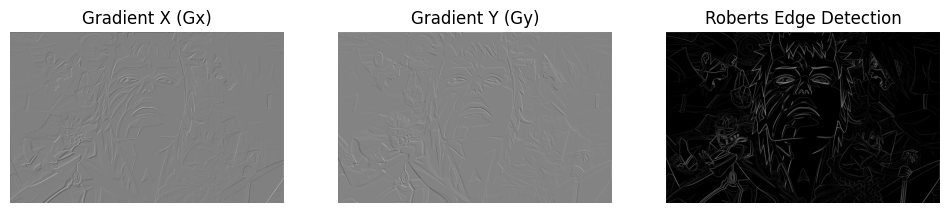

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(r_gradient_x, cmap='gray')
plt.title("Gradient X (Gx)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(r_gradient_y, cmap='gray')
plt.title("Gradient Y (Gy)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(r_edge_magnitude, cmap='gray')
plt.title("Roberts Edge Detection")
plt.axis("off")

plt.show()

### SOBEL EDGE DETECTION (5 x 5)

In [ ]:
sobel_x1 = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y1 = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)

sobel_edges1 = np.sqrt(sobel_x1**2 + sobel_y1**2)

sobel_edges1 = (sobel_edges1 / sobel_edges1.max()) * 255
sobel_edges1 = sobel_edges1.astype(np.uint8)

In [ ]:
rows,cols = image_gray.shape

Gx1 = np.array([[-1,-2,0,2,1],[-2,-3,0,3,2],[-3,-5,0,5,3],[-2,-3,0,3,2],[-1,-2,0,2,1]])
Gy1 = np.array([[1,2,3,2,1],[2,3,5,3,2],[0,0,0,0,0],[-2,-3,-5,-3,-2],[-1,-2,-3,-2,-1]])

In [ ]:
gradient_x1 = np.zeros((rows-4,cols-4))
gradient_y1 = np.zeros((rows-4,cols-4))
gradient_magnitude1 = np.zeros((rows-4,cols-4))

for i in range(2,rows-2):
    for j in range(2,cols-2):

        region1 = blurred_image[i-2:i+3, j-2:j+3]  # 5x5 region
        gx1 = np.sum(Gx1*region1)
        gy1 = np.sum(Gy1*region1)
        gradient_x1[i-2,j-2] = gx1
        gradient_y1[i-2,j-2] = gy1
        gradient_magnitude1[i-2,j-2] = np.sqrt(gx1**2 + gy1**2)

gradient_magnitude1 = (gradient_magnitude1/gradient_magnitude1.max()) * 255.0
gradient_magnitude1 = gradient_magnitude1.astype(np.uint8)

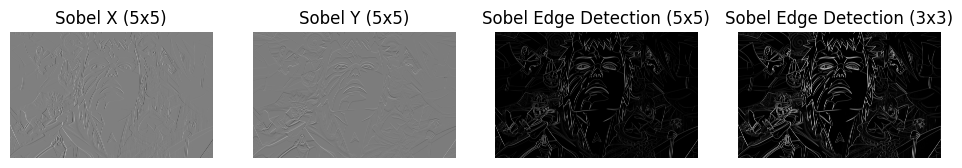

In [ ]:
# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(gradient_x1, cmap='gray')
plt.title("Sobel X (5x5)")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(gradient_y1, cmap='gray')
plt.title("Sobel Y (5x5)")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(gradient_magnitude1, cmap='gray')
plt.title("Sobel Edge Detection (5x5)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection (3x3)")
plt.axis("off")

plt.show()

In [ ]:
def prewitt_operator(image):

    prewitt_x = np.array([[-1, 0, 1],
                           [-1, 0, 1],
                           [-1, 0, 1]], dtype=np.float32)

    prewitt_y = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]], dtype=np.float32)

    grad_x = cv2.filter2D(src=image, ddepth=cv2.CV_64F, kernel=prewitt_x)
    grad_y = cv2.filter2D(src=image, ddepth=cv2.CV_64F, kernel=prewitt_y)

    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255

    edge_image = gradient_magnitude.astype(np.uint8)
    return edge_image

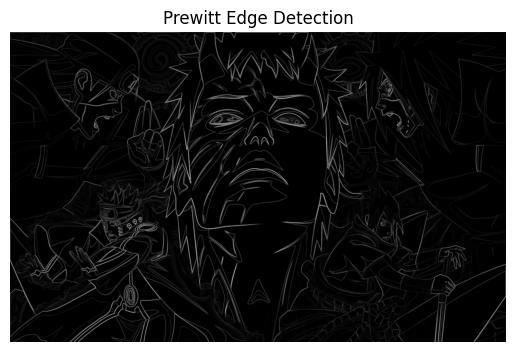

In [ ]:
prewitt_image = prewitt_operator(blurred_image)
plt.imshow(prewitt_image,cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis("off")
plt.show()